In [28]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.0 MB/s eta 0:00:00a 0:00:01


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = '/Users/sahanaj/DS203-Project-main/new-test-data/test-mfcc-v2' #update with where you stored the file

def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []

# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:21]
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)

        delta_delta_mean = np.mean(delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_mfcc, axis=1)
    
        PCA_mfcc = PCA(n_components=5)
        PCA_mfcc.fit(mfcc_data.T)
        PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            range_max_min.flatten(),
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosale'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        else:
            label = 'Other'
            
        print(f'Processed {file_name}')
        print(features.shape)
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-47.csv
(242,)
Processed Asha-Bhosle-53.csv
(242,)
Processed Kishore-Kumar-43.csv
(242,)
Processed Kishore-Kumar-57.csv
(242,)
Processed Lavni-43.csv
(242,)
Processed Lavni-57.csv
(242,)
Processed Michael-Jackson-29.csv
(242,)
Processed Asha-Bhosle-8.csv
(242,)
Processed Michael-Jackson-15.csv
(242,)
Processed Asha-Bhosle-9.csv
(242,)
Processed Michael-Jackson-14.csv
(242,)
Processed Michael-Jackson-28.csv
(242,)
Processed Lavni-56.csv
(242,)
Processed Lavni-42.csv
(242,)
Processed Kishore-Kumar-56.csv
(242,)
Processed Kishore-Kumar-42.csv
(242,)
Processed Asha-Bhosle-52.csv
(242,)
Processed Asha-Bhosle-46.csv
(242,)
Processed Asha-Bhosle-50.csv
(242,)
Processed Asha-Bhosle-44.csv
(242,)
Processed Kishore-Kumar-54.csv
(242,)
Processed Kishore-Kumar-40.csv
(242,)
Processed Kishore-Kumar-68.csv
(242,)
Processed Lavni-54.csv
(242,)
Processed Lavni-40.csv
(242,)
Processed Michael-Jackson-16.csv
(242,)
Processed Michael-Jackson-17.csv
(242,)
Processed Lavni-41.csv
(242,

In [ ]:

#perform EDA here
#Correlation HeatMap
#Scatterplots and Boxplots


In [18]:

# Splitting the data into features (X) and labels (y)
X = total_data_df.drop(columns=['File', 'Label'])
y = total_data_df['Label']


In [20]:

# Splitting into training (70%) and test (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    'SVC_linear': SVC(kernel='linear', probability=True),
    'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}



Training Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



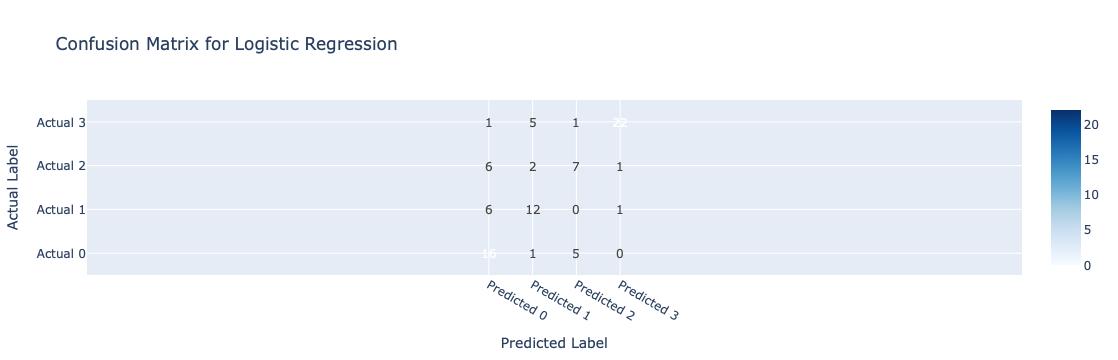


Training K-Nearest Neighbors...


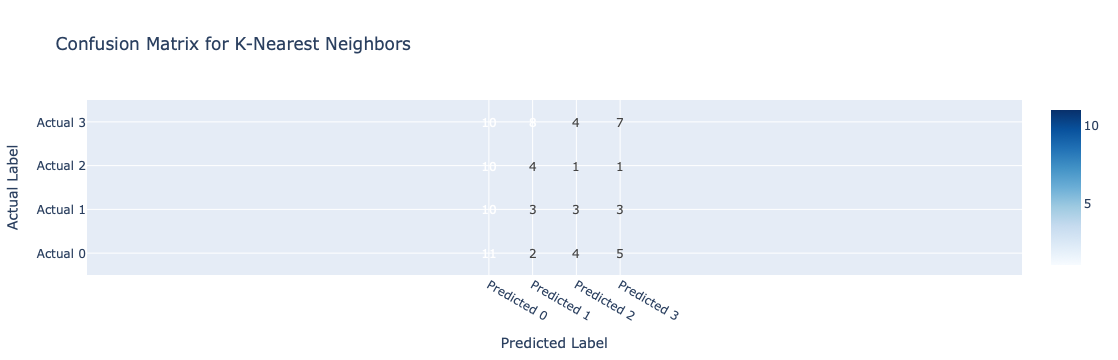


Training Random Forest...


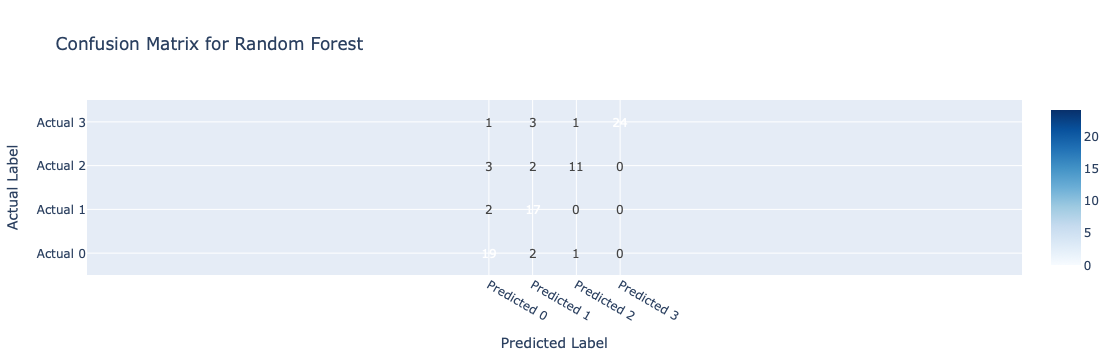


Training Gradient Boosting...


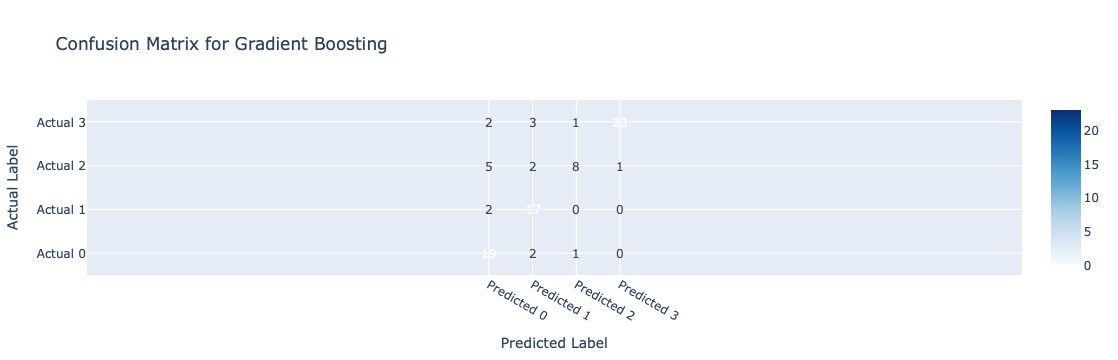


Training AdaBoost...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



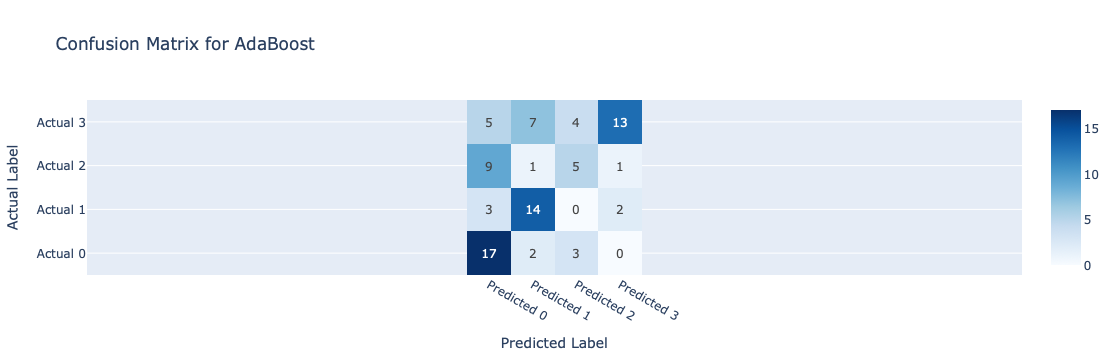


Training Naive Bayes...


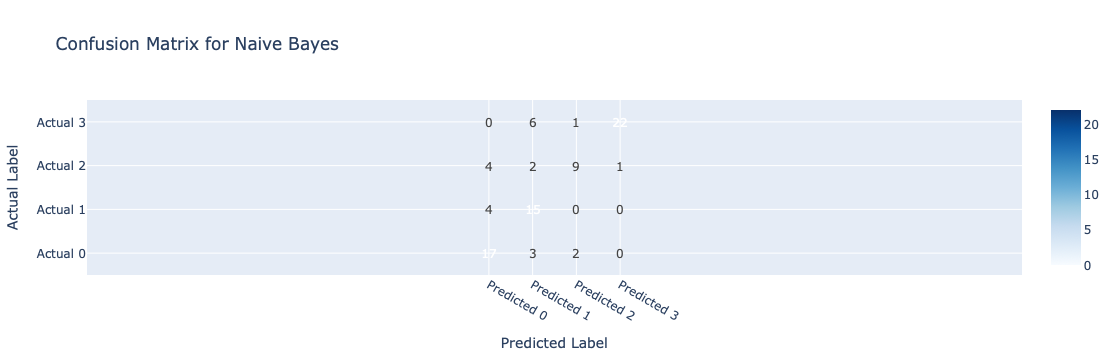


Training Decision Tree...


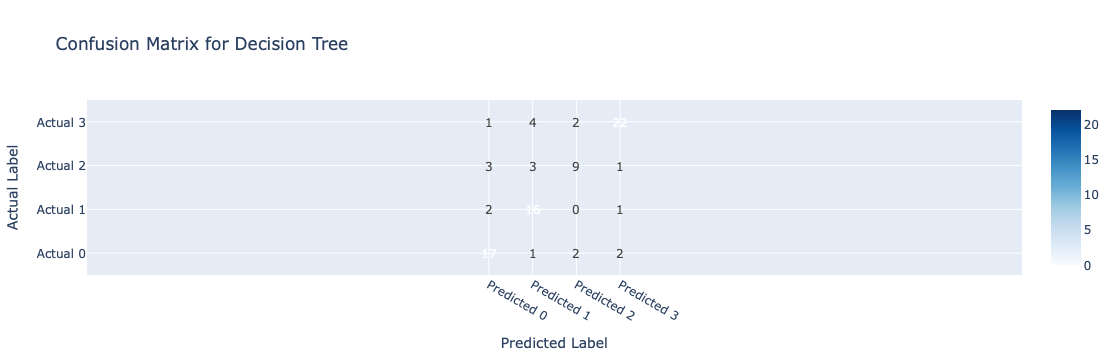


Training XGBoost...


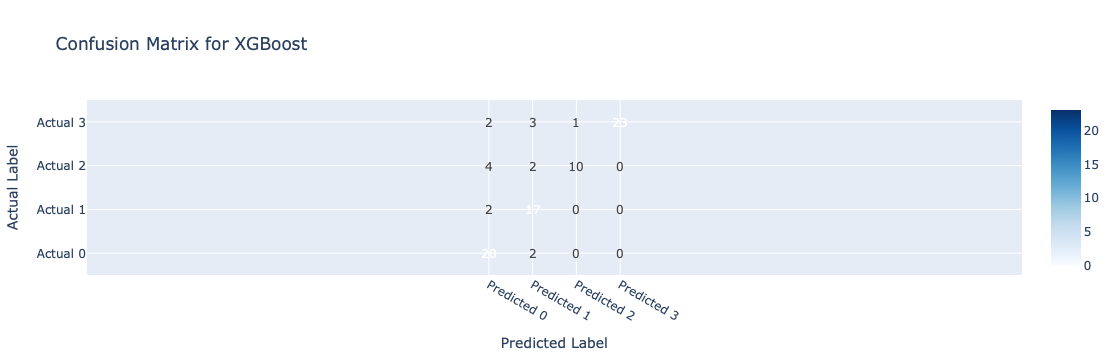


Training SVC_linear...


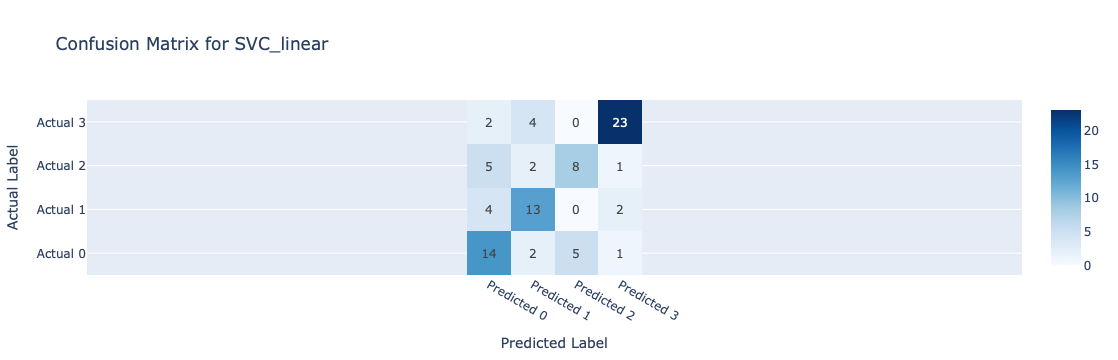


Training SVC_rbf...


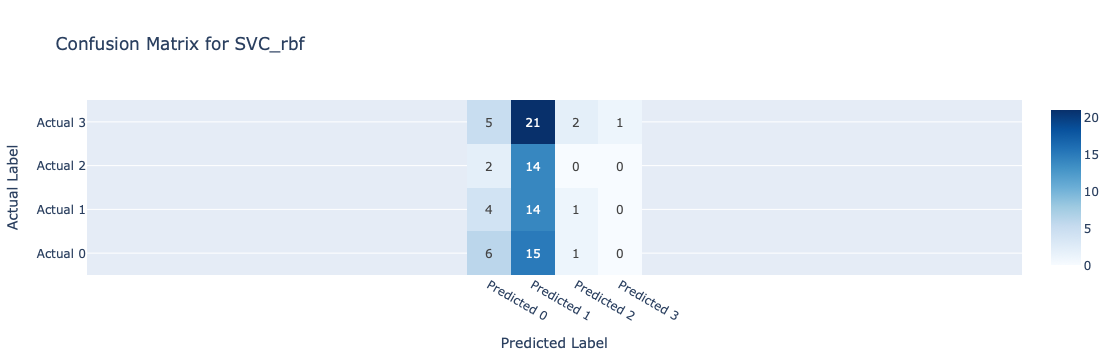


Training RandomForest_1...


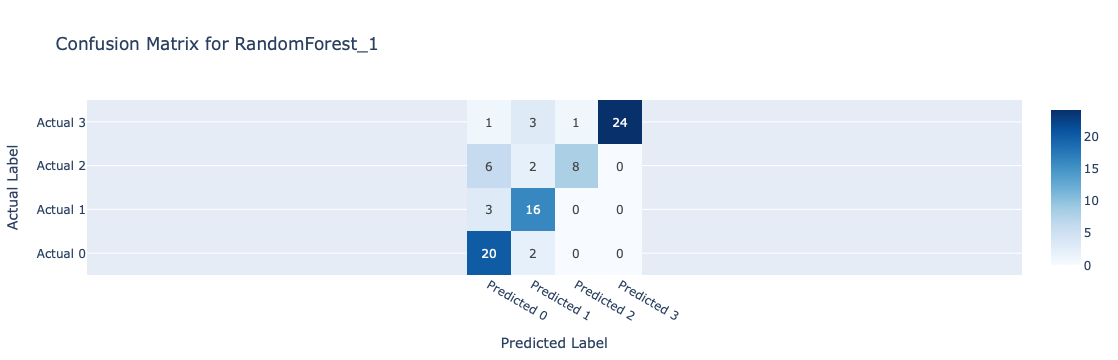


Training RandomForest_3...


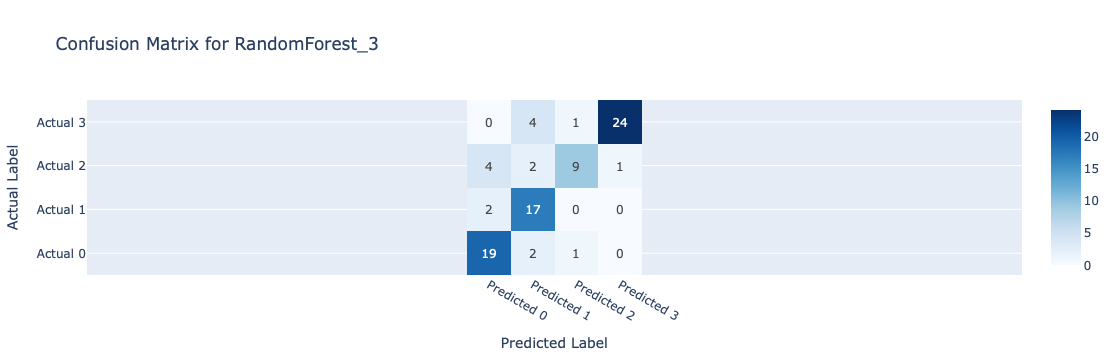


Training RandomForest_5...


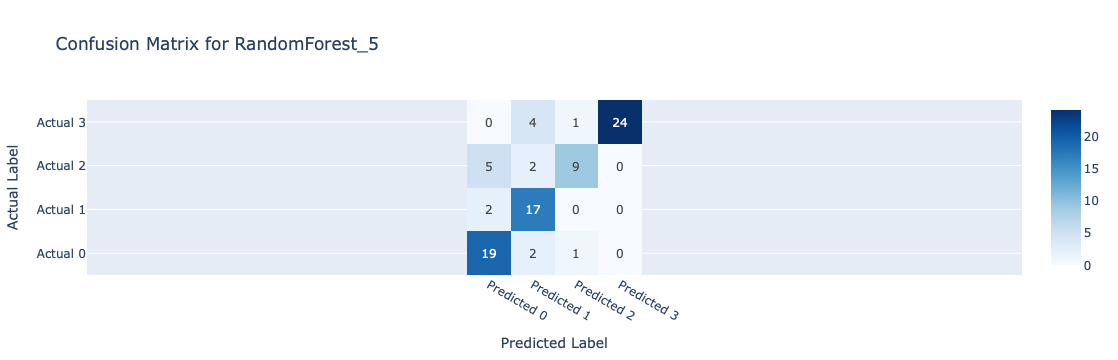


Training NeuralNetwork_1...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



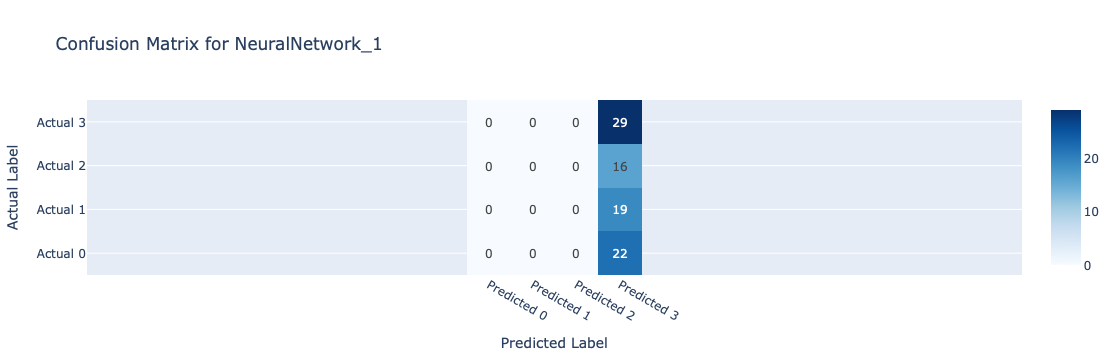


Training NeuralNetwork_2...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



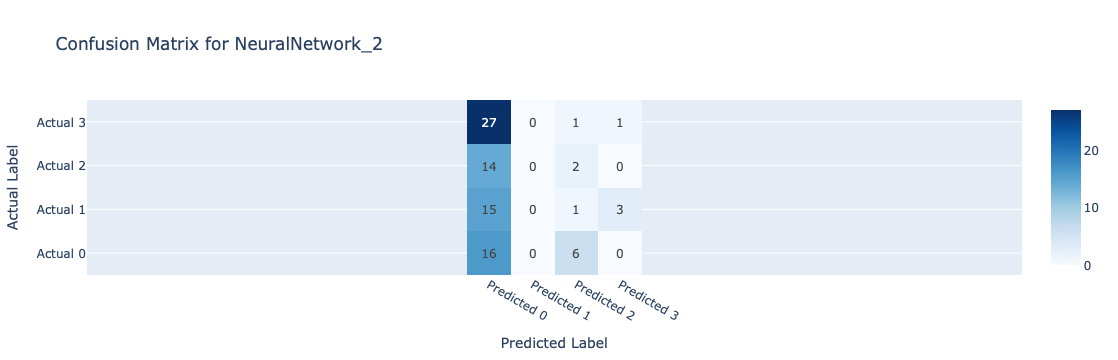


Training NeuralNetwork_3...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



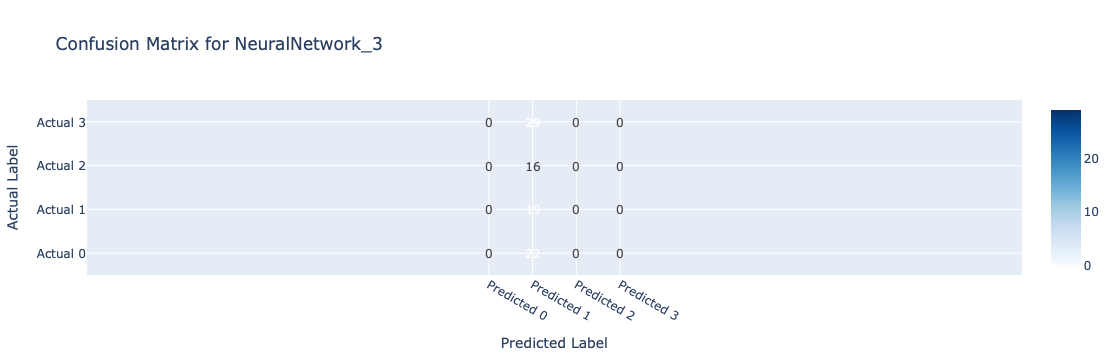


Training NeuralNetwork_4...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



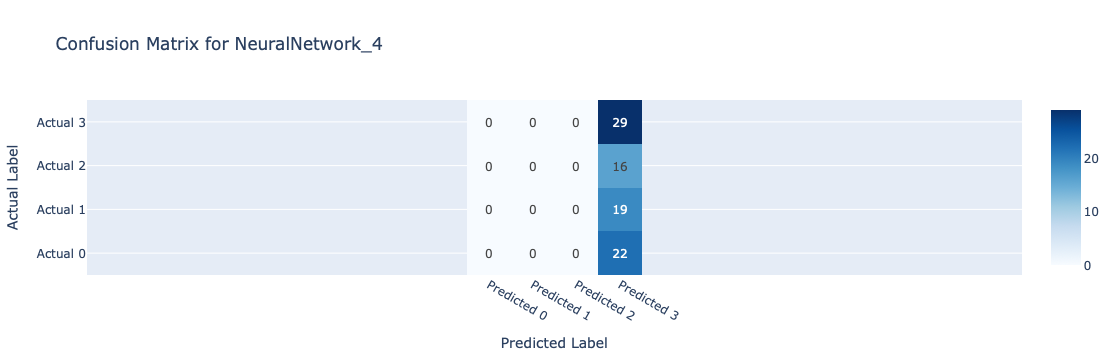

In [58]:
import plotly.graph_objects as go

results = {}

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Storing metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test_encoded, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred),
        "Classification Report": classification_report(y_test_encoded, y_pred)
    }

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()


In [60]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy:
0.6627906976744186

Precision:
0.6829842905023338

Recall:
0.6627906976744186

F1 Score:
0.6662306847684051

Confusion Matrix:
[[16  1  5  0]
 [ 6 12  0  1]
 [ 6  2  7  1]
 [ 1  5  1 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        22
           1       0.60      0.63      0.62        19
           2       0.54      0.44      0.48        16
           3       0.92      0.76      0.83        29

    accuracy                           0.66        86
   macro avg       0.65      0.64      0.64        86
weighted avg       0.68      0.66      0.67        86



Metrics for K-Nearest Neighbors:

Accuracy:
0.2558139534883721

Precision:
0.2706536457464438

Recall:
0.2558139534883721

F1 Score:
0.24435215946843852

Confusion Matrix:
[[11  2  4  5]
 [10  3  3  3]
 [10  4  1  1]
 [10  8  4  7]]

Classification Report:
              precision    recall  f1-score   sup

In [66]:
print("\nAll Models Accuracy:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy']:.4f}")


All Models Accuracy:
Logistic Regression: 0.6628
K-Nearest Neighbors: 0.2558
Random Forest: 0.8256
Gradient Boosting: 0.7791
AdaBoost: 0.5698
Naive Bayes: 0.7326
Decision Tree: 0.7442
XGBoost: 0.8140
SVC_linear: 0.6744
SVC_rbf: 0.2442
RandomForest_1: 0.7907
RandomForest_3: 0.8023
RandomForest_5: 0.8023
NeuralNetwork_1: 0.3372
NeuralNetwork_2: 0.2209
NeuralNetwork_3: 0.2209
NeuralNetwork_4: 0.3372


In [68]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision']:.4f}")


All Models Precison:
Logistic Regression: 0.6830
K-Nearest Neighbors: 0.2707
Random Forest: 0.8455
Gradient Boosting: 0.8021
AdaBoost: 0.6083
Naive Bayes: 0.7635
Decision Tree: 0.7505
XGBoost: 0.8456
SVC_linear: 0.6818
SVC_rbf: 0.4758
RandomForest_1: 0.8268
RandomForest_3: 0.8206
RandomForest_5: 0.8266
NeuralNetwork_1: 0.1137
NeuralNetwork_2: 0.1784
NeuralNetwork_3: 0.0488
NeuralNetwork_4: 0.1137


In [70]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall']:.4f}")


All Models Recall:
Logistic Regression: 0.6628
K-Nearest Neighbors: 0.2558
Random Forest: 0.8256
Gradient Boosting: 0.7791
AdaBoost: 0.5698
Naive Bayes: 0.7326
Decision Tree: 0.7442
XGBoost: 0.8140
SVC_linear: 0.6744
SVC_rbf: 0.2442
RandomForest_1: 0.7907
RandomForest_3: 0.8023
RandomForest_5: 0.8023
NeuralNetwork_1: 0.3372
NeuralNetwork_2: 0.2209
NeuralNetwork_3: 0.2209
NeuralNetwork_4: 0.3372


In [78]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score']:.4f}")


All Models f1-Score:
Logistic Regression: 0.6662
K-Nearest Neighbors: 0.2444
Random Forest: 0.8281
Gradient Boosting: 0.7763
AdaBoost: 0.5605
Naive Bayes: 0.7373
Decision Tree: 0.7429
XGBoost: 0.8155
SVC_linear: 0.6756
SVC_rbf: 0.1757
RandomForest_1: 0.7896
RandomForest_3: 0.8013
RandomForest_5: 0.8027
NeuralNetwork_1: 0.1701
NeuralNetwork_2: 0.1361
NeuralNetwork_3: 0.0800
NeuralNetwork_4: 0.1701


In [80]:
#show decision boundary
#ROC Curve

In [82]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category